# KIAM Week 1 : Task 1

●	Perform Exploratory Data Analysis (EDA) analysis :

        ○	Descriptive Statistics:

             ■	Obtain basic statistics for textual lengths (like headline length).

             ■	Count the number of articles per publisher to identify which publishers are most active.

             ■	Analyze the publication dates to see trends over time, such as increased news frequency on particular days or during specific events.

        ○	Text Analysis(Topic Modeling):

            ■	Use natural language processing to identify common keywords or phrases, potentially extracting topics or significant events (like "FDA approval", "price target", etc.).

        ○	Time Series Analysis:

            ■	How does the publication frequency vary over time? Are there spikes in article publications related to specific market events?

            ■	Analysis of publishing times might reveal if there’s a specific time when most news is released, which could be crucial for traders and automated trading systems.

        ○	Publisher Analysis:

            ■	Which publishers contribute most to the news feed? Is there a difference in the type of news they report?

            ■	If email addresses are used as publisher names, identify unique domains to see if certain organizations contribute more frequently.


In [6]:
# Import Essential Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
# Import Data

df=pd.read_csv("../Data/newsData/raw_analyst_ratings.csv")

# Exploring the Data Head

df.head()



,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [11]:
# Exploring the Size & Shape of the data

print("The Size of the Data :" ,df.size)
print("The Shape of the Data: ", df.shape)

The Size of the Data : 8443968
The Shape of the Data:  (1407328, 6)


In [13]:
# Exploring the Data Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


In [14]:
# Check for Missing data

df.isnull().sum()

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64

In [15]:
# Check for Dupplicates

df.duplicated().sum()

np.int64(0)

#Based on the Preliminary EDA :

1. The Data is in the form of a CSV file.
2. It Contains 6 Columns & 1,407,328 Rows.
3. There are no null Fields (no Missing Data)
4. There are No Dupplicates

# Sub Tasks
## Task 1 : Descriptive Statisitcs

In [25]:
# Cleaning the Data

# Drop the Unnamed Column

df=df.drop(df.columns[0],axis=1)

# convert to date time

df['date']=pd.to_datetime(df['date'],  errors='coerce').dt.tz_localize(None)

# Check the First Rows

df.head()

,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20,A
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07,A
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06,A
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59,A


In [28]:
# Get Headline Length

df['Head_line_Length'] = df['headline'].apply(len)

df['Head_line_Length'].describe()

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: Head_line_Length, dtype: float64

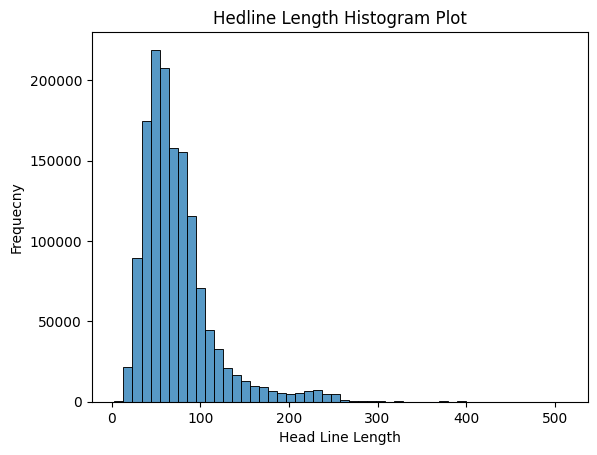

<Figure size 640x480 with 0 Axes>

In [113]:
sns.histplot(data=df['Head_line_Length'],bins=50)
plt.xlabel('Head Line Length')
plt.ylabel('Frequecny')
plt.title('Hedline Length Histogram Plot')
plt.show()
plt.tight_layout()

In [30]:
# Get The Number of Articles per Publisher
publishers = df['publisher'].value_counts()
publishers

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64

In [31]:
# Get the top 10 publishers that are active

publishers.head(10)

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64

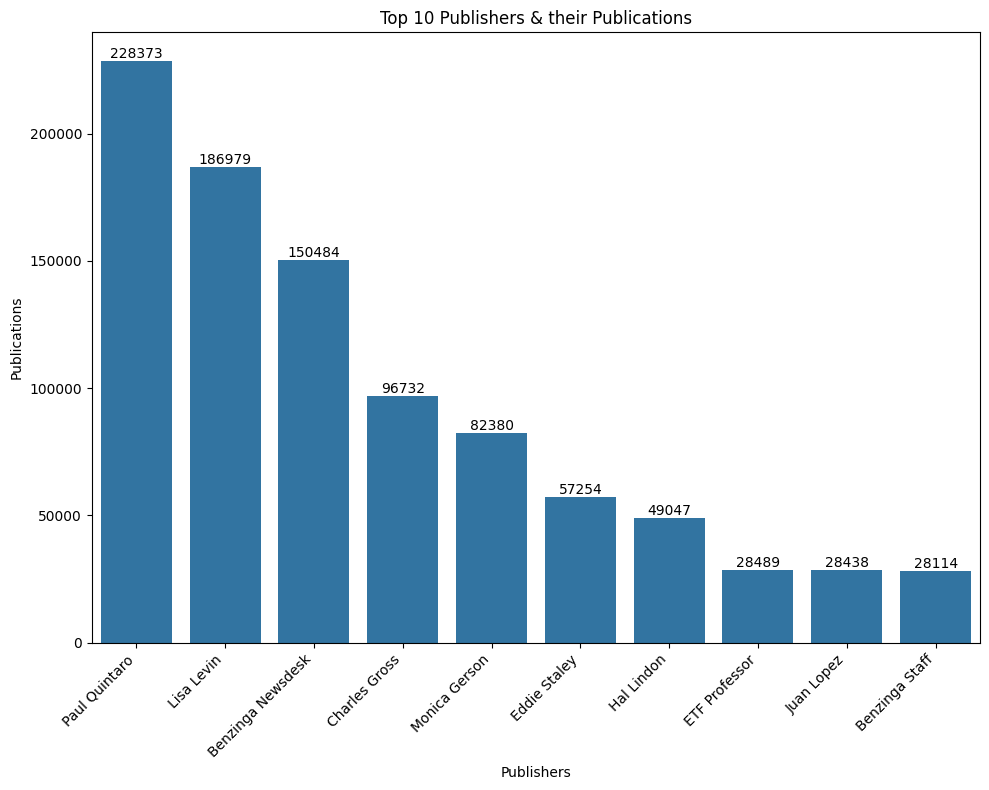

In [43]:
# Visualize the Top 10 Publishers

plt.figure(figsize=(10,8))

ax = sns.barplot(data=publishers.head(10))

# Add data labels
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), ".0f"),
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.xticks(rotation=45, ha='right')
plt.xlabel('Publishers')
plt.ylabel('Publications')
plt.title('Top 10 Publishers & their Publications')
plt.tight_layout()
plt.show()

In [48]:
# Analyze Publication Dates to Identify Trends

# Firts Extract Useful Time Features

df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month
df['Day'] = df['date'].dt.day
df['Weekday'] = df['date'].dt.day_name()
df['Hour'] = df['date'].dt.hour
df['Week'] = df['date'].dt.isocalendar().week


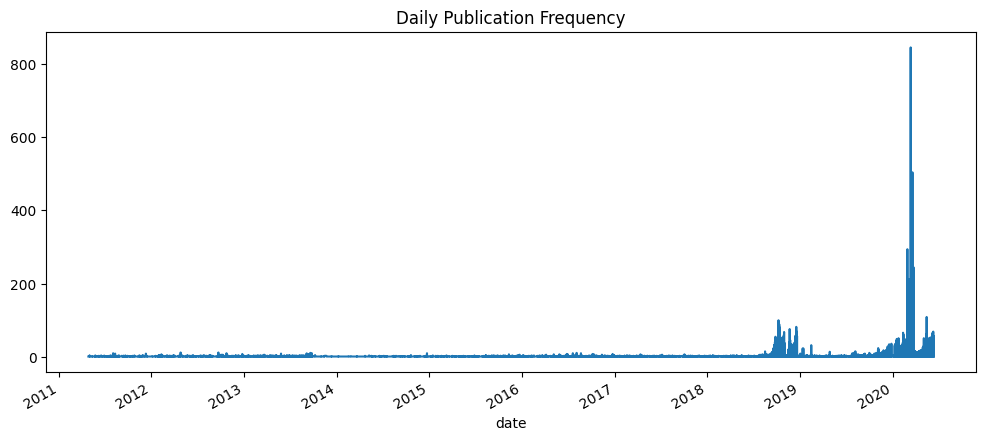

In [49]:
#Analyze Volume Trends Over Time

# Plot 1 : Daily Publication Trend

daily_trend = df.groupby('date')['publisher'].count()
daily_trend.plot(figsize=(12,5), title='Daily Publication Frequency')
plt.show()


C:\Users\henokt\AppData\Local\Temp\ipykernel_21056\516544148.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_trend = df.resample('M', on='date')['publisher'].count()


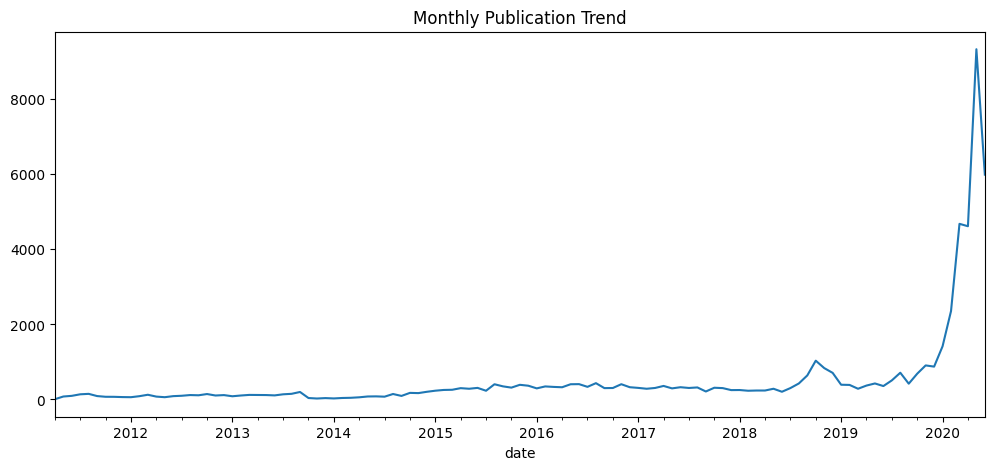

In [52]:
#Analyze Volume Trends Over Time

# Plot 2: Monthly Trend (seasonality detection)

monthly_trend = df.resample('M', on='date')['publisher'].count()
monthly_trend.plot(figsize=(12,5), title='Monthly Publication Trend')
plt.show()


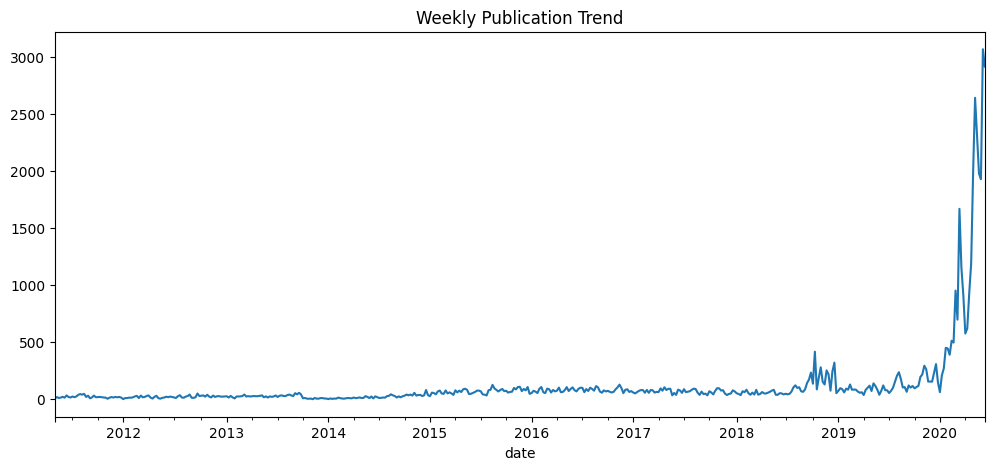

In [51]:
#Analyze Volume Trends Over Time


# Plot 3 : Weekly Trend (event-driven spikes)

weekly_trend = df.resample('W', on='date')['publisher'].count()
weekly_trend.plot(figsize=(12,5), title='Weekly Publication Trend')
plt.show()

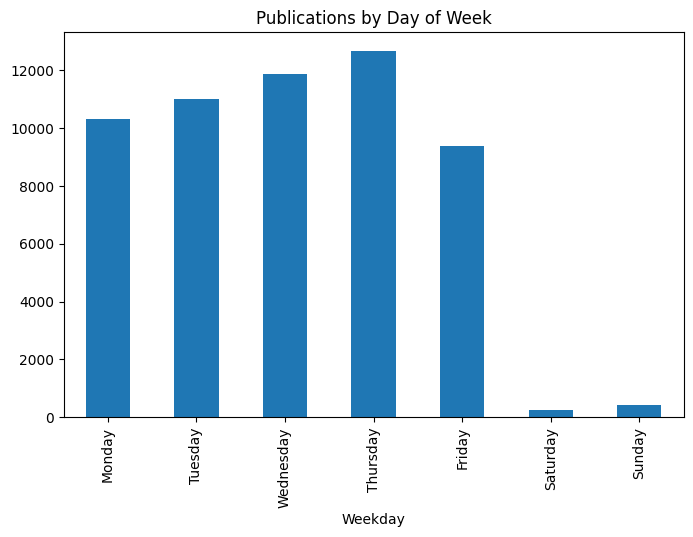

In [53]:
#Analyze Volume Trends Over Time

#Plot 4 : Analyze Trends by Day of Week

weekday_trend = df.groupby('Weekday')['publisher'].count().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
)

weekday_trend.plot(kind='bar', figsize=(8,5), title='Publications by Day of Week')

plt.show()

In [55]:
#Analyze Volume Trends Over Time


#Plot 5 : Identify Peaks Related to Specific Events

threshold = daily_trend.mean() + 2 * daily_trend.std()
spike_days = daily_trend[daily_trend > threshold]
print(spike_days)

date
2018-08-16 11:15:13    15
2018-09-18 09:27:25    23
2018-09-20 11:26:29    26
2018-09-21 08:19:07    33
2018-09-24 09:48:45    41
                       ..
2020-06-11 10:16:30    16
2020-06-11 10:22:31    19
2020-06-11 10:25:28    40
2020-06-11 10:25:52    23
2020-06-11 10:34:01    19
Name: publisher, Length: 293, dtype: int64


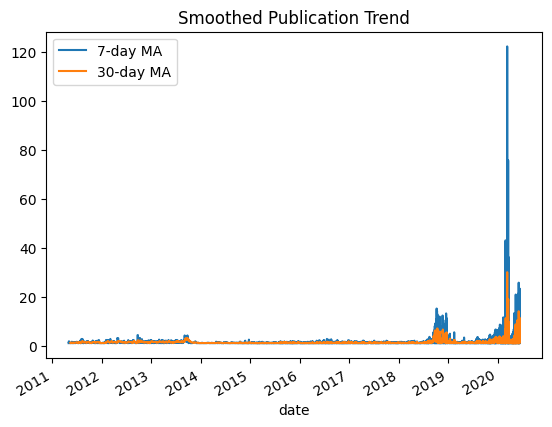

In [56]:
#Analyze Volume Trends Over Time

# Plot 6 : Rolling Time Windows (Trend Smoothing)

rolling_7 = daily_trend.rolling(7).mean()
rolling_30 = daily_trend.rolling(30).mean()

rolling_7.plot(label='7-day MA')
rolling_30.plot(label='30-day MA')
plt.legend()
plt.title('Smoothed Publication Trend')
plt.show()


# Sub Tasks
## Task 2 : Text Anaysis (Topic Modeling)

Sub Tasks 
    2. Text Analysis(Topic Modeling):

✅ Goal: Extract Common Keywords, Phrases, and Topics Using NLP

Given the headline column contains text data, this is where we focus our NLP pipeline.

Below is the complete  workflow:

🧼 1. Text Cleaning & Preprocessing

We need to standardize your text before extracting insights.

✔️ Convert text to lowercase

✔️ Remove punctuation
✔️ Remove stopwords ("the", "and", "is"…)
✔️ Remove numbers
✔️ Optional: remove publisher names, tickers, or URLs


🔑 2. Extract Most Common Keywords

✔️ Use CountVectorizer or TfidfVectorizer to get word frequencies.

This helps us to find words like:
“earnings”, “approval”, “downgrade”, “merger”, “FDA”, “forecast”, “deal”, “inflation”, “target”

🧵 3. Extract Common Phrases (Bigrams & Trigrams)

Useful for discovering event-related patterns such as:

"FDA approval"

"price target"

"earnings call"

"interest rate"

"supply chain"


🧠 4. Topic Modeling (LDA) — Extract Main Themes

Topic modeling helps identify clusters like:

Market updates

Earnings reports

Mergers and acquisitions

Analyst price targets

Product releases

Step A: Use TF-IDF Vectorizer


Step B: Apply Latent Dirichlet Allocation (LDA)


📝 5. Detect Major Events & Trends from Headlines

Using keywords + publishing dates, you can detect spikes in:

Market volatility

FDA drug approvals

Company earnings

Fed interest rate announcements

Crypto events

IPO announcements


🎯 Summary — What This Analysis Will Reveal

Your NLP workflow will allow you to extract:

✔️ Top Keywords

→ earnings, fda, approval, price target, merger…

✔️ Top 2- and 3-word Phrases

→ "fda approval", "price target", "acquires stake", "beats estimates"

✔️ Main Topics in the News

→ Analyst ratings, M&A, macroeconomic news, product launches, trials

✔️ Event Trends Over Time

→ Detect days where major financial news spiked.

In [72]:
# import new Required Libraries

import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [71]:
#Text Cleaning & Preprocessing

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)  # remove urls
    text = re.sub(r'[^a-z\s]', '', text)  # remove punctuation & numbers
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return " ".join(words)

df['clean_headline'] = df['headline'].apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\henokt\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\henokt\AppData\Roaming\nltk_data...


In [74]:
#Extract Most Common Keywords

cv = CountVectorizer(max_features=50)  # top 50 words
word_counts = cv.fit_transform(df['clean_headline'])

common_words = pd.DataFrame(
    word_counts.sum(axis=0).tolist()[0],
    index=cv.get_feature_names_out(),
    columns=['count']
).sort_values('count', ascending=False)

print(common_words.head(20))

            count
stock      201100
share      146182
est        140660
eps        128929
report     124503
market     120900
update      93394
earnings    87185
sale        85320
top         81280
price       74211
pt          73144
week        70774
buy         68661
lower       68095
announces   66529
company     65424
downgrade   63812
trading     61165
raise       59896


In [75]:
#Extract Common Phrases (Bigrams & Trigrams)

# Bigrams

bigram_vectorizer = CountVectorizer(ngram_range=(2,2), max_features=50)
bigrams = bigram_vectorizer.fit_transform(df['clean_headline'])

common_bigrams = pd.DataFrame(
    bigrams.sum(axis=0).tolist()[0],
    index=bigram_vectorizer.get_feature_names_out(),
    columns=['count']
).sort_values('count', ascending=False)

print(common_bigrams.head(20))

                    count
eps est             61227
report eps          51243
price target        47710
benzingas top       44258
stock moving        40092
market update       33135
earnings scheduled  32054
initiate coverage   29041
raise pt            27270
week high           26058
week low            24984
revenue est         24914
share several       24080
est revenue         24051
company trading     23164
trading higher      22937
adj eps             21708
hit week            21700
premarket session   21670
top upgrade         21115


In [76]:
#Extract Common Phrases (Bigrams & Trigrams)

# Trigrams

trigram_vectorizer = CountVectorizer(ngram_range=(3,3), max_features=50)
trigrams = trigram_vectorizer.fit_transform(df['clean_headline'])

common_Trigrams = pd.DataFrame(
    trigrams.sum(axis=0).tolist()[0],
    index=trigram_vectorizer.get_feature_names_out(),
    columns=['count']
).sort_values('count', ascending=False)

print(common_Trigrams.head(20))

                          count
report eps est            35449
est revenue est           22065
eps est revenue           21676
benzingas top upgrade     21114
stock hit week            19907
set new week              16835
stock set new             16777
eps est sale              15457
raise price target        15369
top upgrade downgrade     14508
biggest mover yesterday   13942
est sale est              13499
lower price target        13027
company trading higher    11839
market update market      11790
hit week high             11373
company trading lower     11280
adj eps est               11128
new week low              11104
midmorning market update  10748


In [ ]:
# Topic Modeling (LDA) — Extract Main Themes
# Warning : could take around 20 Minutes (Depending on the Compute resoureces avaialible)

# Step A: Use TF-IDF Vectorizer

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['clean_headline'])

#Step B: Apply Latent Dirichlet Allocation (LDA)

lda = LatentDirichletAllocation(n_components=10, random_state=42) # Selecting 10 Topics
lda.fit(X)

#Step C: Print Topics & Keywords

def display_topics(model, feature_names, no_top_words):
    for idx, topic in enumerate(model.components_):
        print(f"Topic {idx+1}:")
        print([feature_names[i] for i in topic.argsort()[-no_top_words:]])
        print()

display_topics(lda, tfidf.get_feature_names_out(), 15)


Topic 1:
['july', 'august', 'ref', 'may', 'april', 'oi', 'preview', 'ask', 'november', 'call', 'february', 'option', 'alert', 'scheduled', 'earnings']

Topic 2:
['biggest', 'th', 'yesterday', 'hitting', 'thursday', 'etf', 'new', 'set', 'friday', 'hit', 'low', 'high', 'watch', 'stock', 'week']

Topic 3:
['sector', 'study', 'trial', 'report', 'biggest', 'fda', 'contract', 'target', 'phase', 'announces', 'etf', 'price', 'change', 'blog', 'analyst']

Topic 4:
['cfo', 'dividend', 'energy', 'acquire', 'term', 'co', 'new', 'agreement', 'name', 'report', 'deal', 'ceo', 'announces', 'say', 'share']

Topic 5:
['morgan', 'coverage', 'downgrade', 'initiate', 'premarket', 'price', 'neutral', 'target', 'raise', 'stock', 'buy', 'maintains', 'session', 'moving', 'pt']

Topic 6:
['following', 'coronavirus', 'amid', 'oil', 'offering', 'stock', 'lower', 'several', 'higher', 'company', 'loser', 'morning', 'market', 'trading', 'share']

Topic 7:
['yoy', 'inc', 'beat', 'yesterday', 'adj', 'see', 'fy', 'bigg

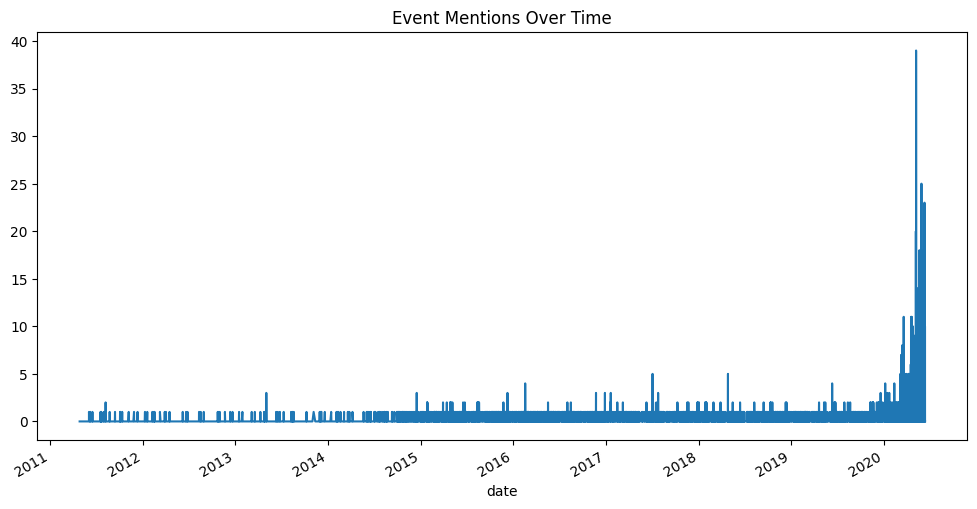

In [79]:
# Detect Major Events & Trends from Headlines

event_terms = ['fda', 'approval', 'merger', 'price target', 'downgrade', 'upgrade']

df['event_flag'] = df['clean_headline'].apply(
    lambda x: any(term in x for term in event_terms)
)

event_counts = df.groupby('date')['event_flag'].sum()
event_counts.plot(title='Event Mentions Over Time', figsize=(12,6))
plt.show()

# Sub Tasks 
## 3. Time Series Analysis

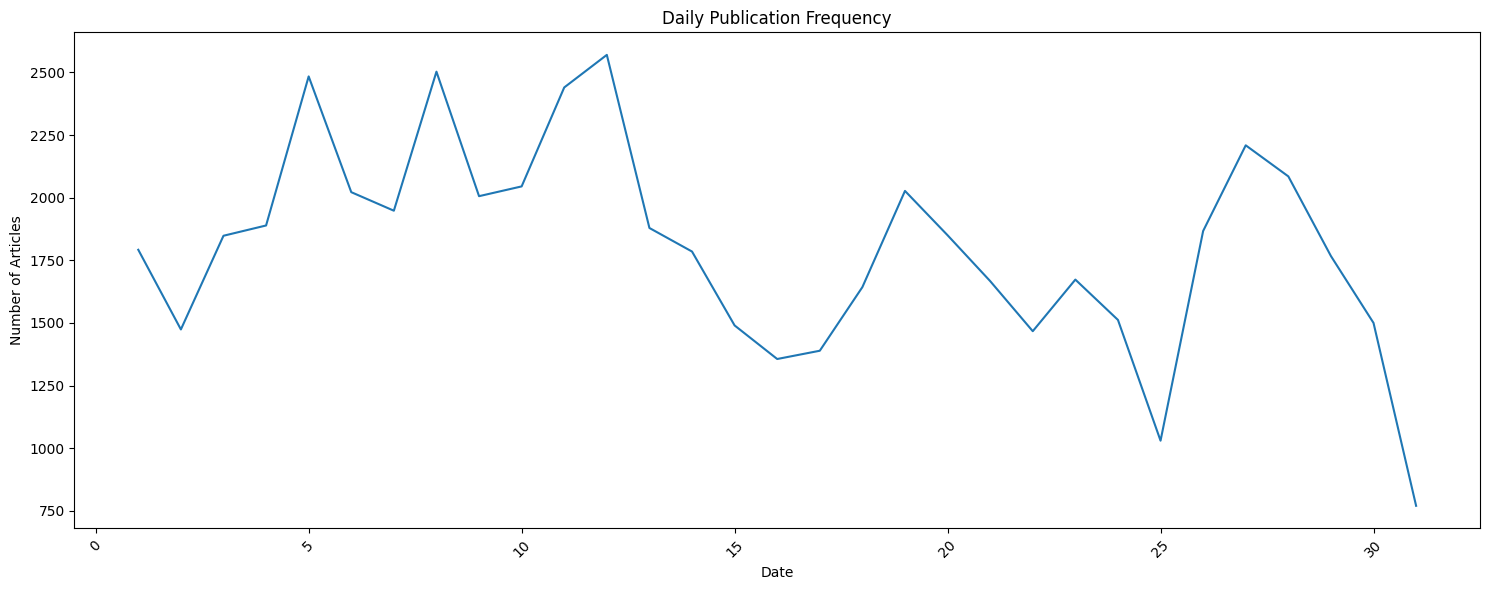

In [ ]:
# Daily Publication Frequency

daily_counts = df.groupby('Day').size().reset_index(name='count')

plt.figure(figsize=(15,6))
sns.lineplot(data=daily_counts, x='Day', y='count')
plt.title("Daily Publication Frequency")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

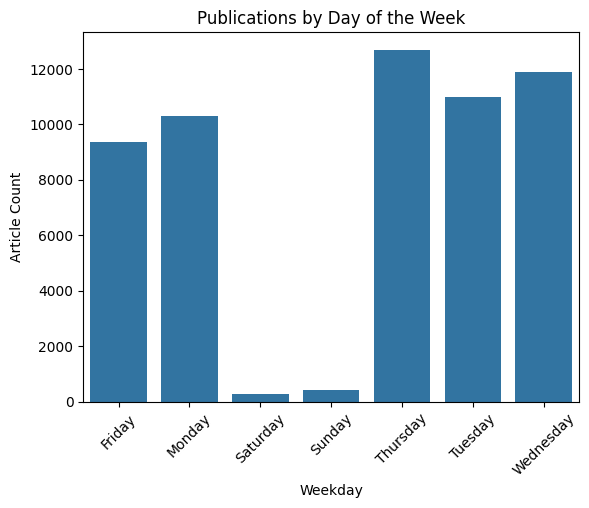

In [84]:
# Weekly Trends

weekly_counts = df.groupby('Weekday').size().reset_index(name='count')

sns.barplot(data=weekly_counts, x='Weekday', y='count')
plt.title("Publications by Day of the Week")
plt.ylabel("Article Count")
plt.xticks(rotation=45)
plt.show()

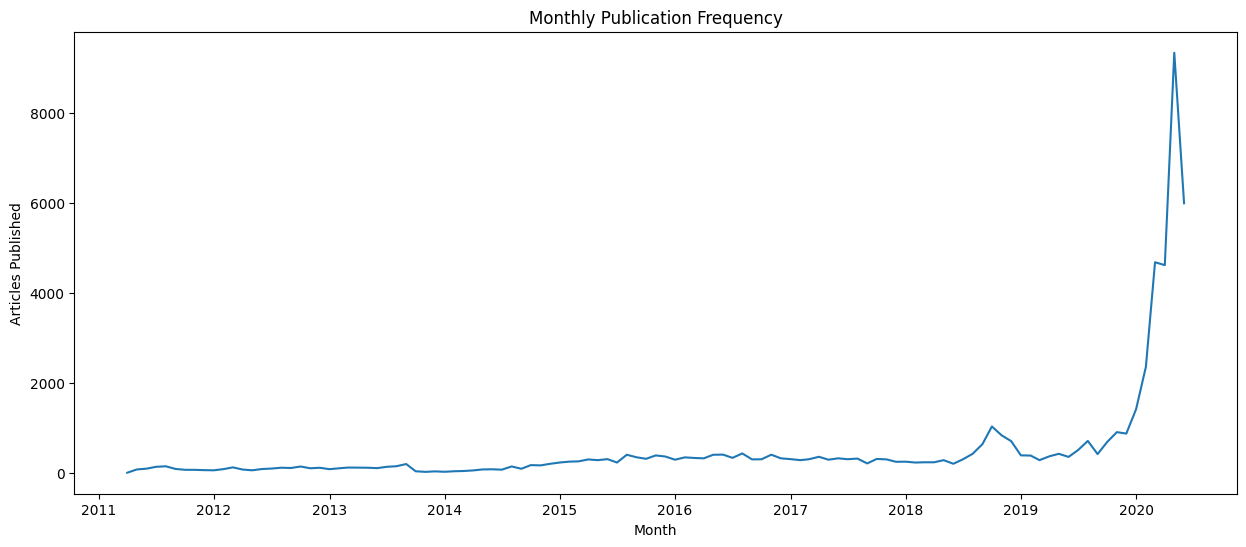

In [87]:
#Monthly or Yearly Trends

monthly_counts = df.groupby(['Year', 'Month']).size().reset_index(name='count')
monthly_counts['Year_Month'] = pd.to_datetime(monthly_counts[['Year', 'Month']].assign(day=1))

plt.figure(figsize=(15,6))
sns.lineplot(data=monthly_counts, x='Year_Month', y='count')
plt.title("Monthly Publication Frequency")
plt.xlabel("Month")
plt.ylabel("Articles Published")
plt.show()


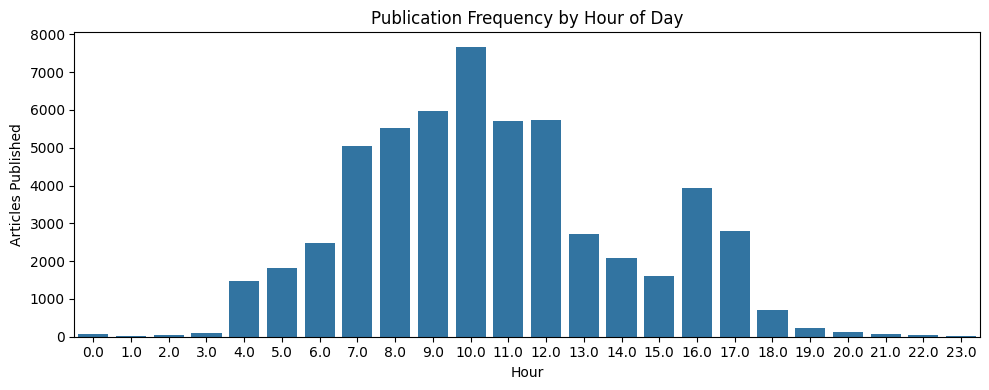

In [90]:
#Hour-of-Day Frequency (Intraday Analysis)

hour_counts = df.groupby('Hour').size().reset_index(name='count')

plt.figure(figsize=(10,4))

sns.barplot(data=hour_counts, x='Hour', y='count')
plt.title("Publication Frequency by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Articles Published")
plt.tight_layout()
plt.show()

In [92]:
#Market Event Spike Detection

mean_count = daily_counts['count'].mean()
std_count = daily_counts['count'].std()

daily_counts['is_spike'] = daily_counts['count'] > (mean_count + 2 * std_count)
spike_days = daily_counts[daily_counts['is_spike']]

spike_days.head()

,Day,count,is_spike


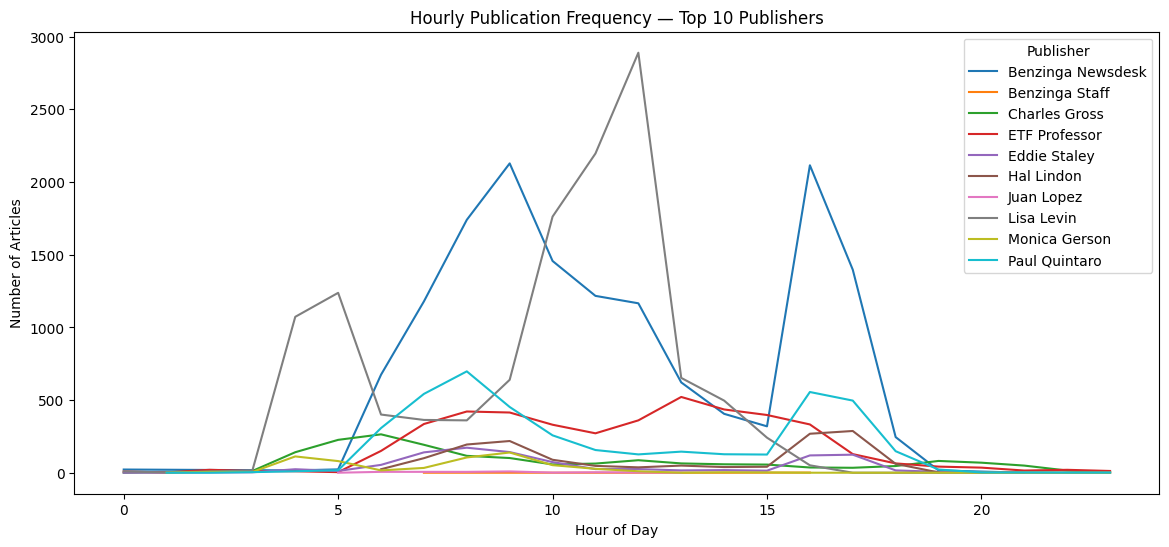

In [95]:
#Publisher-specific time series

# Calculate total publications per publisher
top_publishers = (
    df.groupby('publisher')
      .size()
      .sort_values(ascending=False)
      .head(10)
      .index
)

# Filter dataset to include only top 10 publishers
pub_hour_top10 = df[df['publisher'].isin(top_publishers)]

# Group again for hour-level analysis
pub_hour = (
    pub_hour_top10
    .groupby(['publisher', 'Hour'])
    .size()
    .reset_index(name='count')
)

# Plot
plt.figure(figsize=(14,6))
sns.lineplot(data=pub_hour, x='Hour', y='count', hue='publisher')
plt.title("Hourly Publication Frequency — Top 10 Publishers")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Articles")
plt.legend(title="Publisher")
plt.show()


# Sub Tasks
## 4. Publisher Analysis:

In [99]:
#Identify Publishers That Contribute Most to the News Feed

publisher_counts = (
    df['publisher']
    .value_counts()
    .reset_index()
    #rename(columns={'index': 'publisher', 'publisher': 'count'})
)

publisher_counts.head(20)


,publisher,count
0,Paul Quintaro,228373
1,Lisa Levin,186979
2,Benzinga Newsdesk,150484
3,Charles Gross,96732
4,Monica Gerson,82380
5,Eddie Staley,57254
6,Hal Lindon,49047
7,ETF Professor,28489
8,Juan Lopez,28438
9,Benzinga Staff,28114


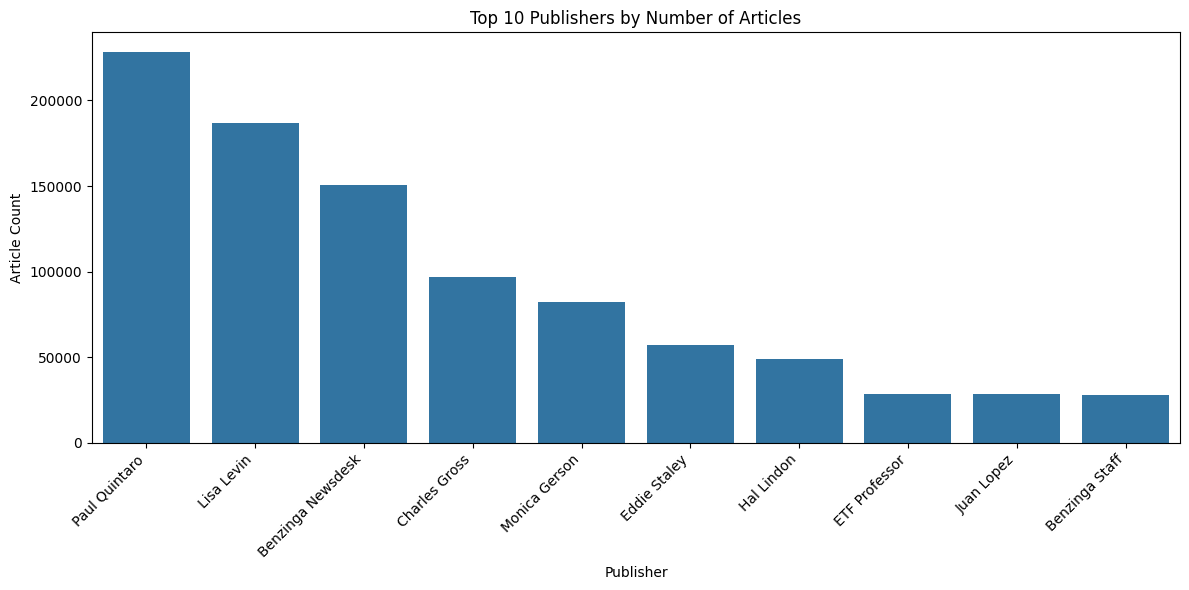

In [100]:
#Plot the top contributors

plt.figure(figsize=(12,6))
sns.barplot(data=publisher_counts.head(10), x='publisher', y='count')
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Publishers by Number of Articles")
plt.xlabel("Publisher")
plt.ylabel("Article Count")
plt.tight_layout()
plt.show()


In [101]:
#2. Is There a Difference in the Type of News They Report?

vectorizer = CountVectorizer(stop_words='english', max_features=50)
X = vectorizer.fit_transform(df['headline'].astype(str))

keywords = vectorizer.get_feature_names_out()

In [102]:
#Compare keyword frequency per publisher

top_publishers = publisher_counts['publisher'].head(5).tolist()

publisher_keyword_dist = {}

for pub in top_publishers:
    subset = df[df['publisher'] == pub]['headline'].astype(str)
    X_sub = vectorizer.transform(subset)
    keyword_sum = X_sub.sum(axis=0).A1
    publisher_keyword_dist[pub] = dict(zip(keywords, keyword_sum))

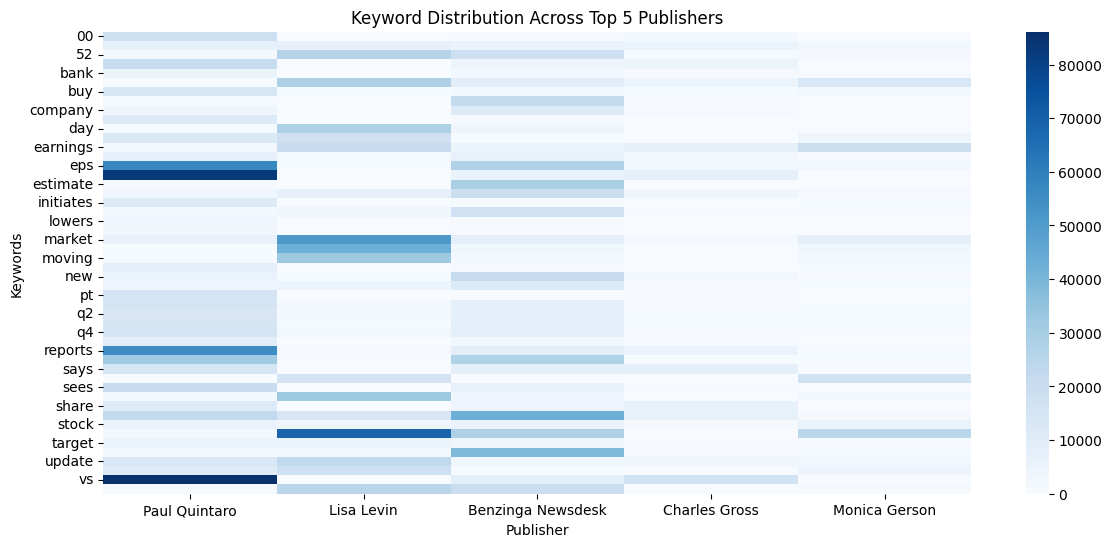

In [103]:
#Convert to a DataFrame

keyword_df = pd.DataFrame(publisher_keyword_dist).T
keyword_df.head()

#Visualize
plt.figure(figsize=(14,6))
sns.heatmap(keyword_df.T, cmap='Blues')
plt.title("Keyword Distribution Across Top 5 Publishers")
plt.ylabel("Keywords")
plt.xlabel("Publisher")
plt.show()

In [106]:
#3. Detect Email-Based Publisher Names & Extract Domains

email_publishers = df[df['publisher'].str.contains('@', na=False)]
email_publishers.head()

#Extract domains

email_publishers['domain'] = email_publishers['publisher'].str.extract(r'@(.+)$')

#Count domain frequency

domain_counts = (
    email_publishers['domain']
    .value_counts()
    .reset_index()
)

domain_counts.head(10)

C:\Users\henokt\AppData\Local\Temp\ipykernel_21056\2692302131.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  email_publishers['domain'] = email_publishers['publisher'].str.extract(r'@(.+)$')


,domain,count
0,benzinga.com,7937
1,gmail.com,139
2,andyswan.com,5
3,investdiva.com,2
4,tothetick.com,2
5,eosdetroit.io,1
6,forextraininggroup.com,1
7,stockmetrix.net,1


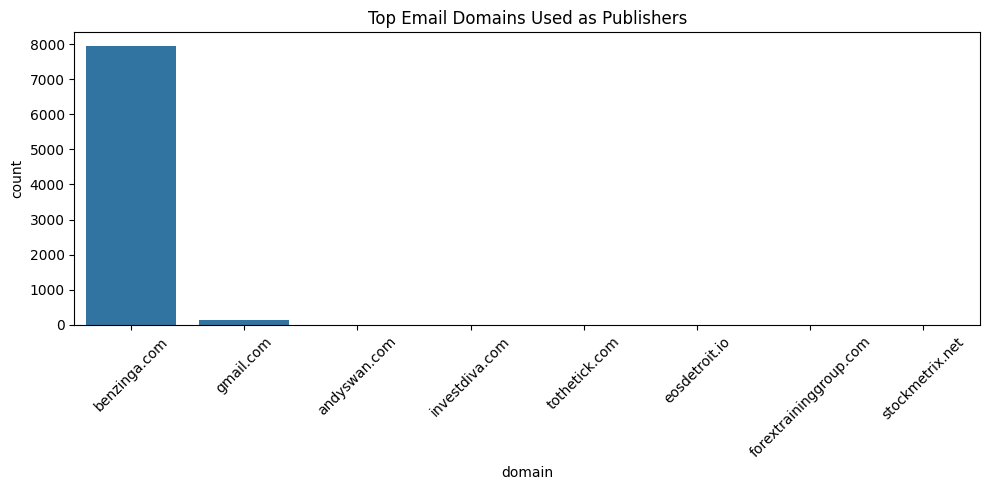

In [107]:
#Plot Domain Frequency

plt.figure(figsize=(10,5))
sns.barplot(data=domain_counts.head(10), x='domain', y='count')
plt.xticks(rotation=45)
plt.title("Top Email Domains Used as Publishers")
plt.tight_layout()
plt.show()


In [108]:
#4. Compare Topics per Domain (Email-based Publishers)

domain_subset = df[df['publisher'].str.contains('@', na=False)]
domain_subset['domain'] = domain_subset['publisher'].str.extract(r'@(.+)$')

domain_headline_keywords = domain_subset.groupby('domain')['headline'].apply(lambda x: " ".join(x))
domain_headline_keywords.head()


C:\Users\henokt\AppData\Local\Temp\ipykernel_21056\1103398587.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  domain_subset['domain'] = domain_subset['publisher'].str.extract(r'@(.+)$')


domain
andyswan.com              Consumers Are Flocking To Wyndham's Hotels, Is...
benzinga.com              CFRA Maintains Hold on Agilent Technologies, L...
eosdetroit.io             'Bank of America Joins Marco-Polo Blockchain T...
forextraininggroup.com    This Chart Shows Why Netflix Is Primed For A T...
gmail.com                 Morgan Stanley Maintains Overweight on Agilent...
Name: headline, dtype: object

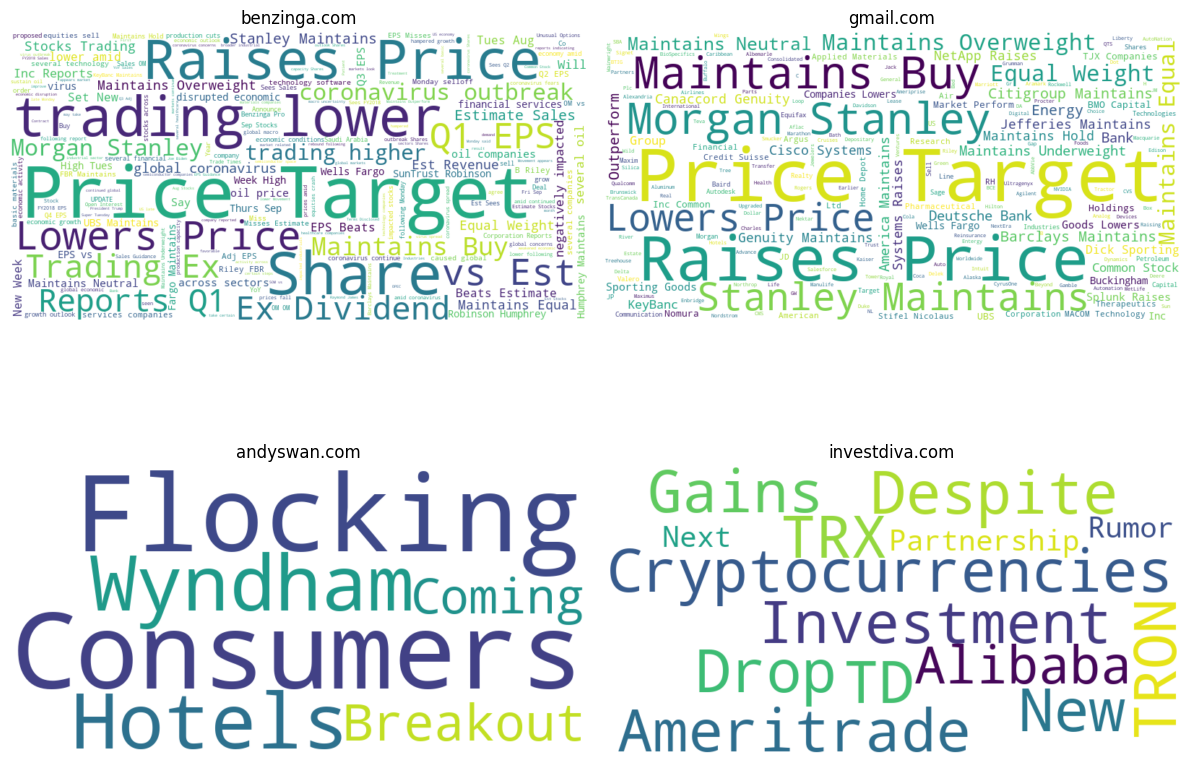

In [110]:
# Visualize with Word CLoud

from wordcloud import WordCloud
plt.figure(figsize=(12,10))

for i, domain in enumerate(domain_counts['domain'].head(4)):
    text = " ".join(domain_subset[domain_subset['domain']==domain]['headline'].astype(str))
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.subplot(2, 2, i+1)
    plt.imshow(wc, interpolation='bilinear')
    plt.title(domain)
    plt.axis('off')

plt.tight_layout()
plt.show()
